In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
# Read participant csv file
df_participant = pd.read_csv('participant_data.csv')

# Read eyetrack data
df_eyetrack = pd.read_csv('eyetrack_data.tsv', sep='\t', header=0)

# Remove the columns that are not needed
df_eyetrack = df_eyetrack.drop(columns=['Recording', 'Gender', 'Timeline', 'TOI', 'Interval'])

# Delete all rows for participant "Test Participant"
df_eyetrack = df_eyetrack[df_eyetrack['Participant'] != 'Test Participant']

In [3]:
# Divide df_participant into two dataframes based on the Base Language column
df_participant_java = df_participant[df_participant['Base Language'] == 'Java']

df_participant_python = df_participant[df_participant['Base Language'] == 'Python']

In [4]:
# # Further divisions

# # Select only the partipants with the following base grade range
# grade_range = [3, 4]
# df_participant_java = df_participant_java[df_participant_java['Base Grade'].between(grade_range[0], grade_range[1])]
# df_participant_python = df_participant_python[df_participant_python['Base Grade'].between(grade_range[0], grade_range[1])]

# # Select only the partipants with "Python Freq" = 1
# df_participant_java = df_participant_java[df_participant_java['Python Freq'] == 1]

<Axes: >

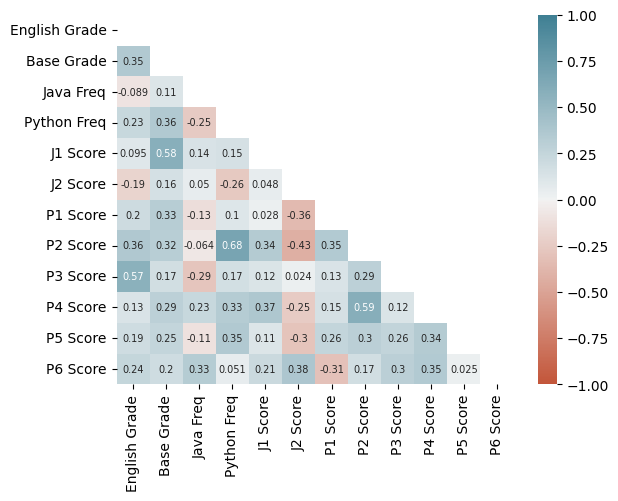

In [5]:
# Compute Pearson correlation coefficients 
corrmat = df_participant_java.corr(numeric_only=True)
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

<Axes: >

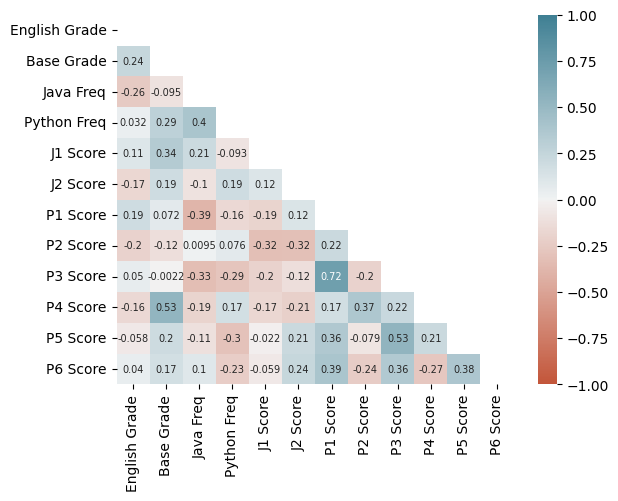

In [6]:
corrmat = df_participant_python.corr(numeric_only=True)
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [7]:
# List the metric columns
metrics = ['Total_duration_of_fixations', 
           'Average_duration_of_fixations', 
           'Number_of_fixations', 
           'Time_to_first_fixation', 
           'Duration_of_first_fixation', 
           'Average_pupil_diameter'
           ]

# Pivot the data into a 3-level table, make the index the Participant column
df_eyetrack = df_eyetrack.pivot_table(index='Participant', 
                                columns=['Media','AOI'], 
                                values= metrics)

# Divide df_eyetrack into two dataframes based on whether the partipant's base language is Java or Python
df_eyetrack_java = df_eyetrack.loc[df_participant_java['Participant']]
df_eyetrack_python = df_eyetrack.loc[df_participant_python['Participant']]


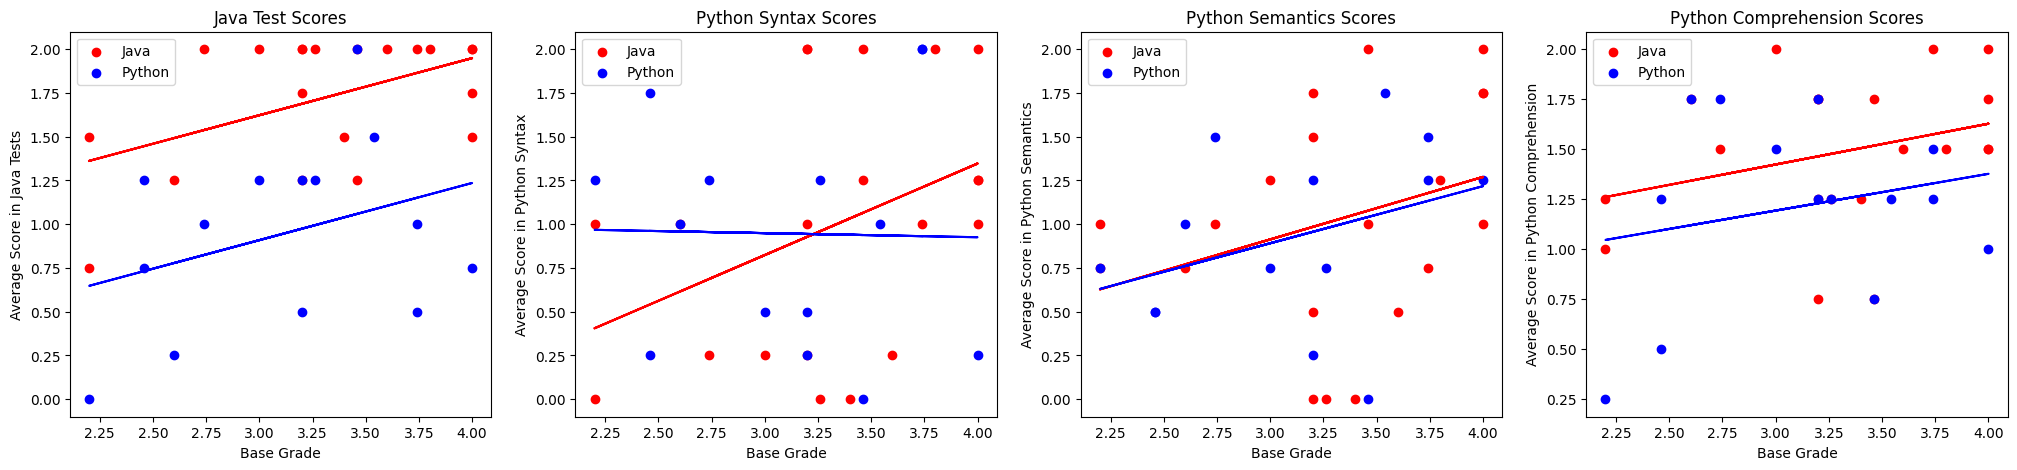

In [8]:
# Plotting graphs for Java/Python participant grades vs their scores

x1 = df_participant_java["Base Grade"]
x2 = df_participant_python["Base Grade"]

scores = ['J1 Score', 'J2 Score']
j_avg_jscores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_jscores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P1 Score', 'P2 Score']
j_avg_psyn_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psyn_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P3 Score', 'P4 Score']
j_avg_psem_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psem_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P5 Score', 'P6 Score']
j_avg_pcomp_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_pcomp_scores = df_participant_python.loc[:, scores].mean(axis = 1)

# Create 4 subplots of scatter graphs
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

subplot_params = [
    [j_avg_jscores, p_avg_jscores,'Java Test Scores', 'Average Score in Java Tests'],
    [j_avg_psyn_scores, p_avg_psyn_scores, 'Python Syntax Scores', 'Average Score in Python Syntax'],
    [j_avg_psem_scores, p_avg_psem_scores, 'Python Semantics Scores', 'Average Score in Python Semantics'],
    [j_avg_pcomp_scores, p_avg_pcomp_scores, 'Python Comprehension Scores', 'Average Score in Python Comprehension']
]

for i in range(len(subplot_params)):
    y1 = subplot_params[i][0]
    y2 = subplot_params[i][1]
    m1, b1 = np.polyfit(x1, y1, 1)
    m2, b2 = np.polyfit(x2, y2, 1)
    axs[i].set_title(subplot_params[i][2])
    axs[i].scatter(x1, y1, color='red')
    axs[i].scatter(x2, y2, color='blue')
    axs[i].plot(x1, m1*x1 + b1, color='red')
    axs[i].plot(x2, m2*x2 + b2, color='blue')
    axs[i].set_xlabel('Base Grade')
    axs[i].set_ylabel(subplot_params[i][3])
    axs[i].legend(['Java', 'Python'])



In [9]:
# Compute Two sample t-tests for all the scores
for i in range(4):
    t_test, p_value = stats.ttest_ind(subplot_params[i][0], subplot_params[i][1])
    print(f'{subplot_params[i][2]}: t-test = {t_test}, p-value = {p_value}')

Java Test Scores: t-test = 5.05163584652051, p-value = 1.710173344857586e-05
Python Syntax Scores: t-test = 0.16498281368286266, p-value = 0.8699953345211379
Python Semantics Scores: t-test = 0.4684573726072064, p-value = 0.642633033873506
Python Comprehension Scores: t-test = 1.9057145969290603, p-value = 0.06570470168547346


In [10]:
# Prepare metrics
metrics = df_eyetrack.columns.levels[0]
to_remove = ['Participant', 'Media', 'AOI']
metrics = [metric for metric in metrics if metric not in to_remove]

In [11]:
# For each of the eye-track metrics, compare between Java and Python participants
tests_aoi = [
    ['py1syn', 'BugIsHere'],
    ['py2syn', 'BugIsHere'],
    ['py1sem', 'BugIsHere'],
    ['py2sem', 'BugIsHere']
]

for test in tests_aoi:
    for metric in metrics:
        j_metric = df_eyetrack_java[metric][test[0]][test[1]]
        p_metric = df_eyetrack_python[metric][test[0]][test[1]]
        t_test, p_value = stats.ttest_ind(j_metric, p_metric)
        print(f'{metric} for {test}: t-test = {t_test}, p-value = {p_value}')

Average_duration_of_fixations for ['py1syn', 'BugIsHere']: t-test = nan, p-value = nan
Average_pupil_diameter for ['py1syn', 'BugIsHere']: t-test = nan, p-value = nan
Duration_of_first_fixation for ['py1syn', 'BugIsHere']: t-test = nan, p-value = nan
Number_of_fixations for ['py1syn', 'BugIsHere']: t-test = -0.5489571229767057, p-value = 0.5868452740539716
Time_to_first_fixation for ['py1syn', 'BugIsHere']: t-test = nan, p-value = nan
Total_duration_of_fixations for ['py1syn', 'BugIsHere']: t-test = -0.8300684333667264, p-value = 0.4126501160323799
Average_duration_of_fixations for ['py2syn', 'BugIsHere']: t-test = -1.5294032127774024, p-value = 0.1359907468859881
Average_pupil_diameter for ['py2syn', 'BugIsHere']: t-test = 0.004549691525726803, p-value = 0.9963981295002031
Duration_of_first_fixation for ['py2syn', 'BugIsHere']: t-test = 1.4182140536402008, p-value = 0.16579402843230218
Number_of_fixations for ['py2syn', 'BugIsHere']: t-test = 1.8038774639658581, p-value = 0.0806721102

In [12]:
# For each of the eye-track metrics, compare between pysyn and pysem for all participants
for metric in metrics:
    py1syn = df_eyetrack[metric]['py1syn']['BugIsHere']
    py2syn = df_eyetrack[metric]['py2syn']['BugIsHere']
    pysyn = (py1syn + py2syn) / 2
    py1sem = df_eyetrack[metric]['py1sem']['BugIsHere']
    py2sem = df_eyetrack[metric]['py2sem']['BugIsHere']
    pysem = (py1sem + py2sem) / 2
    t_test, p_value = stats.ttest_ind(pysyn, pysem, nan_policy='omit')
    print(f'{metric}: t-test = {t_test}, p-value = {p_value}')

Average_duration_of_fixations: t-test = 2.751746518915949, p-value = 0.00797250555522286
Average_pupil_diameter: t-test = 0.8218121343731167, p-value = 0.4146691226400395
Duration_of_first_fixation: t-test = 4.172272534621721, p-value = 0.00010601990995287049
Number_of_fixations: t-test = -3.4958821505234083, p-value = 0.0008498609039490465
Time_to_first_fixation: t-test = 1.9510394179512227, p-value = 0.056062252100105396
Total_duration_of_fixations: t-test = -3.2823275021523086, p-value = 0.0016480322969816827
